In [23]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from graph_reinforcement_learning_using_blockchain_data import config

config.load_dotenv()

True

In [2]:
df_features = pd.read_csv(config.PROCESSED_DATA_DIR / "flashbots" / "Q2_2023" / "features.csv")

In [24]:
df = df_features.drop(columns=["transactionHash", "from", "to", "blockNumber"])
df.head()

,gasUsed,cumulativeGasUsed,transactionIndex,effectiveGasPrice,status,fee,num_logs,dummy_normal_0xddf252ad,dummy_normal_0x8c5be1e5,dummy_normal_0x1c411e9a,...,dummy_arb_0x1c411e9a,dummy_arb_0xd78ad95f,dummy_arb_0xc42079f9,dummy_arb_0x8c5be1e5,dummy_arb_0x7fcf532c,dummy_arb_0x19b47279,dummy_arb_0x908fb5ee,dummy_arb_0xddac4093,dummy_arb_0x8201aa3f,label
0,153529,10750253,111,19150328915,1,2940130847991035,3,1,1,0,...,0,0,0,1,0,0,0,0,0,0
1,123497,229900,1,139502435999,1,17228132338568503,7,1,0,1,...,1,1,0,0,0,0,0,0,0,0
2,21000,15838026,183,22098066562,1,464059397802000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46817,14885776,165,18825121161,1,881335697394537,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32215,3160909,48,19660583885,1,633365709855275,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.drop(columns=["label"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
print("Train Accuracy:", rf.score(X_train, y_train))
print("Test Accuracy:", rf.score(X_test, y_test))

Train Accuracy: 0.9965682196339434
Test Accuracy: 0.982047857784005


In [14]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     22806
           1       0.98      0.99      0.98     22871

    accuracy                           0.98     45677
   macro avg       0.98      0.98      0.98     45677
weighted avg       0.98      0.98      0.98     45677



In [10]:
feature_importances = pd.DataFrame(
    rf.feature_importances_, index=X.columns, columns=["importance"]
).sort_values(by="importance", ascending=False)
feature_importances

,importance
num_logs,2.226688e-01
dummy_arb_0xd78ad95f,1.455554e-01
dummy_normal_0x1c411e9a,1.048356e-01
gasUsed,9.393235e-02
dummy_arb_0xc42079f9,9.007150e-02
dummy_normal_0xc42079f9,5.133650e-02
dummy_normal_0xd78ad95f,4.568778e-02
dummy_arb_0x1c411e9a,4.351828e-02
dummy_normal_0xe1fffcc4,4.165076e-02
transactionIndex,3.562205e-02


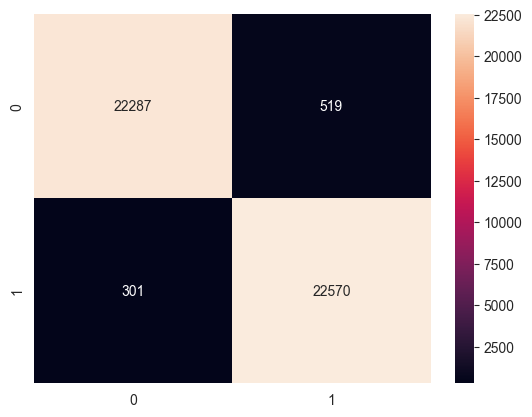

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()